<a href="https://colab.research.google.com/github/asetya/BigData/blob/master/DeteksiMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install opencv-python pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Install virtual monitor**

In [ ]:
#!pip install gym pyvirtualdisplay > /dev/null 2>&1
#!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
#DISPLAY_WIDTH = 1920
#DISPLAY_HEIGHT = 1080

#from IPython import display as ipythondisplay
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(DISPLAY_WIDTH, DISPLAY_HEIGHT))
#display.start()

In [ ]:
#!pip install pyscreenshot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
#import pyscreenshot as ImageGrab

In [18]:
#import cv2
#import numpy as np
#from PIL import ImageGrab

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import time
from google.colab import drive
from IPython.display import clear_output

In [6]:
drive.mount('/content/drive')


#/content/drive/MyDrive/MixedReality

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
videosample = '/content/drive/MyDrive/MixedReality/Asset/bussy.mp4'
cap = cv2.VideoCapture(videosample)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("jumlah frame = ", length )

jumlah frame =  401


In [26]:
#import cv2
#from google.colab.patches import cv2_imshow
#import numpy as np
#from PIL import ImageGrab

def motion_detector_gist():

  previous_frame = None
  lstdiffMag = []

  while True:

    # 1. Load image; convert to RGB
    ret, frame = cap.read()
    img_brg = np.array(frame)
    img_rgb = cv2.cvtColor(src=img_brg, code=cv2.COLOR_BGR2RGB)


    # 2. Prepare image; grayscale and blur
    prepared_frame = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    prepared_frame = cv2.GaussianBlur(src=prepared_frame, ksize=(5, 5), sigmaX=0)

    # 2. Calculate the difference
    if (previous_frame is None):
      # First frame; there is no previous one yet
      previous_frame = prepared_frame
      continue

    # 3. calculate difference and update previous frame
    diff_frame = cv2.absdiff(src1=previous_frame, src2=prepared_frame)
    previous_frame = prepared_frame


    diffMag = cv2.countNonZero(diff_frame)
    lstdiffMag.append(diffMag)

    # 4. Dilute the image a bit to make differences more seeable; more suitable for contour detection
    kernel = np.ones((5, 5))
    diff_frame = cv2.dilate(diff_frame, kernel, 1)

    # 5. Only take different areas that are different enough (>20 / 255)
    thresh_frame = cv2.threshold(src=diff_frame, thresh=20, maxval=255, type=cv2.THRESH_BINARY)[1]

    # 6. Find and optionally draw contours
    contours, _ = cv2.findContours(image=thresh_frame, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    # Comment below to stop drawing contours
    cv2.drawContours(image=img_rgb, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
    # Uncomment 6 lines below to stop drawing rectangles
    for contour in contours:
       if cv2.contourArea(contour) < 50:
         # too small: skip!
           continue
       (x, y, w, h) = cv2.boundingRect(contour)
       cv2.rectangle(img=img_rgb, pt1=(x, y), pt2=(x + w, y + h), color=(0, 255, 0), thickness=2)

    clear_output(wait=True)
    cv2_imshow(img_rgb)

    if (cv2.waitKey(30) == 27):
      out.release()
      break

  # Cleanup
    cv2.destroyAllWindows()


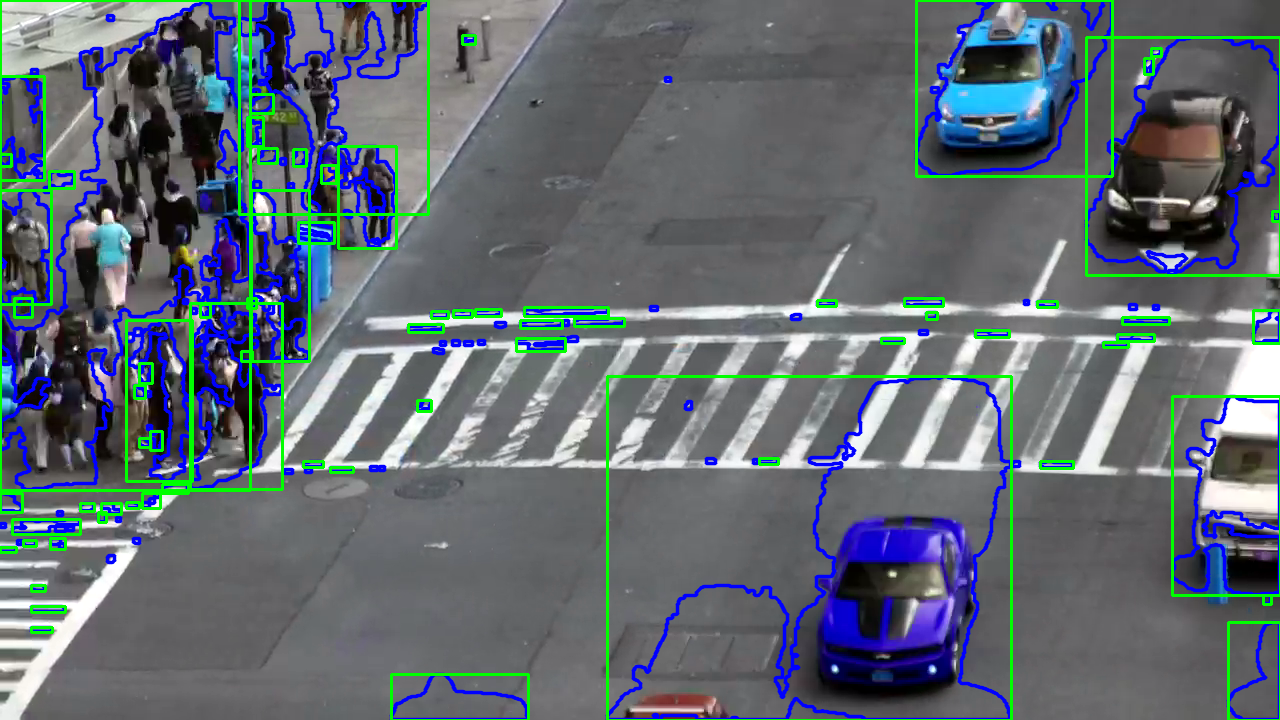

error: ignored

In [27]:
 motion_detector_gist()